In [1]:
pip install face-recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=417d2e6af817bcf4c0fcfe0c37182f289e37b75d9c3c7465832b1731646ad829
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [2]:
pip install Py-OS

  Preparing metadata (setup.py) ... done
  Created wheel for Py-OS: filename=Py_OS-1.0.0-py3-none-any.whl size=15070 sha256=99983f5686a989507c01fbd96626e5ae4e07b5f5b7640466dcfc7999b2e35691
  Stored in directory: /root/.cache/pip/wheels/23/c5/8f/142781a13a0b17e237245e6facef41caf72eac94b924c198a6
Successfully built Py-OS


In [3]:
pip install opencv-python

In [4]:
import face_recognition
import os
import cv2


In [5]:
KNOWN_FACES_DIR= "known_faces"
UNKNOWN_FACES_DIR= "unknown_faces"
TOLERANCE= 0.6;
FRAME_THICKNESS= 3
FONT_THICKNESS= 2
MODEL = "cnn"


In [6]:
print("loading known faces")

loading known faces


In [7]:
known_faces =[]
known_names =[]

for name in os.listdir(KNOWN_FACES_DIR):
    for filename in os.listdir(f"{KNOWN_FACES_DIR}/{name}"):
      image = face_recognition.load_image_file(f"{KNOWN_FACES_DIR}/{name}/{filename}")
      encodings = face_recognition.face_encodings(image)[0]
      known_faces.append(encodings)
      known_names.append(name)


In [15]:
print("processing unknown faces")
for name in os.listdir(UNKNOWN_FACES_DIR):
  print(name)
  image = face_recognition.load_image_file(f"{UNKNOWN_FACES_DIR}/{name}")
  locations= face_recognition.face_locations(image, model=MODEL)
  encodings = face_recognition.face_encodings(image, locations)
  image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

  for face_encoding, face_location in zip(encodings, locations):
    results = face_recognition.compare_faces(known_faces, face_encoding, TOLERANCE )
    match = None
    if True in results:
      match = known_names[results.index(True)]
      print(f"match found: {match}")
      top_left = (face_location[3], face_location[0])
      bottom_right = (face_location[1], face_location[2])

      color =[0, 255, 0]

      cv2.rectangle(image, top_left, bottom_right, color, FRAME_THICKNESS)
      top_left = (face_location[3], face_location[0])
      bottom_right = (face_location[1], face_location[2]+22)
      cv2.rectangle(image, top_left, bottom_right, color)
      cv2.putText=(image,match,(face_location[3]+10, face_location[2]+15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (200,200,200), FONT_THICKNESS )






processing unknown faces
WhatsApp Image 2024-05-08 at 11.03.33 PM.jpeg
WhatsApp Image 2024-05-08 at 11.03.33 PM.jpeg
match found: hassan
WhatsApp Image 2024-05-08 at 11.03.33 PM.jpeg
match found: hassan
WhatsApp Image 2024-05-08 at 11.03.33 PM.jpeg
WhatsApp Image 2024-05-08 at 11.03.33 PM.jpeg


IsADirectoryError: [Errno 21] Is a directory: 'unknown_faces/.ipynb_checkpoints'

In [9]:
from google.colab.patches import cv2_imshow


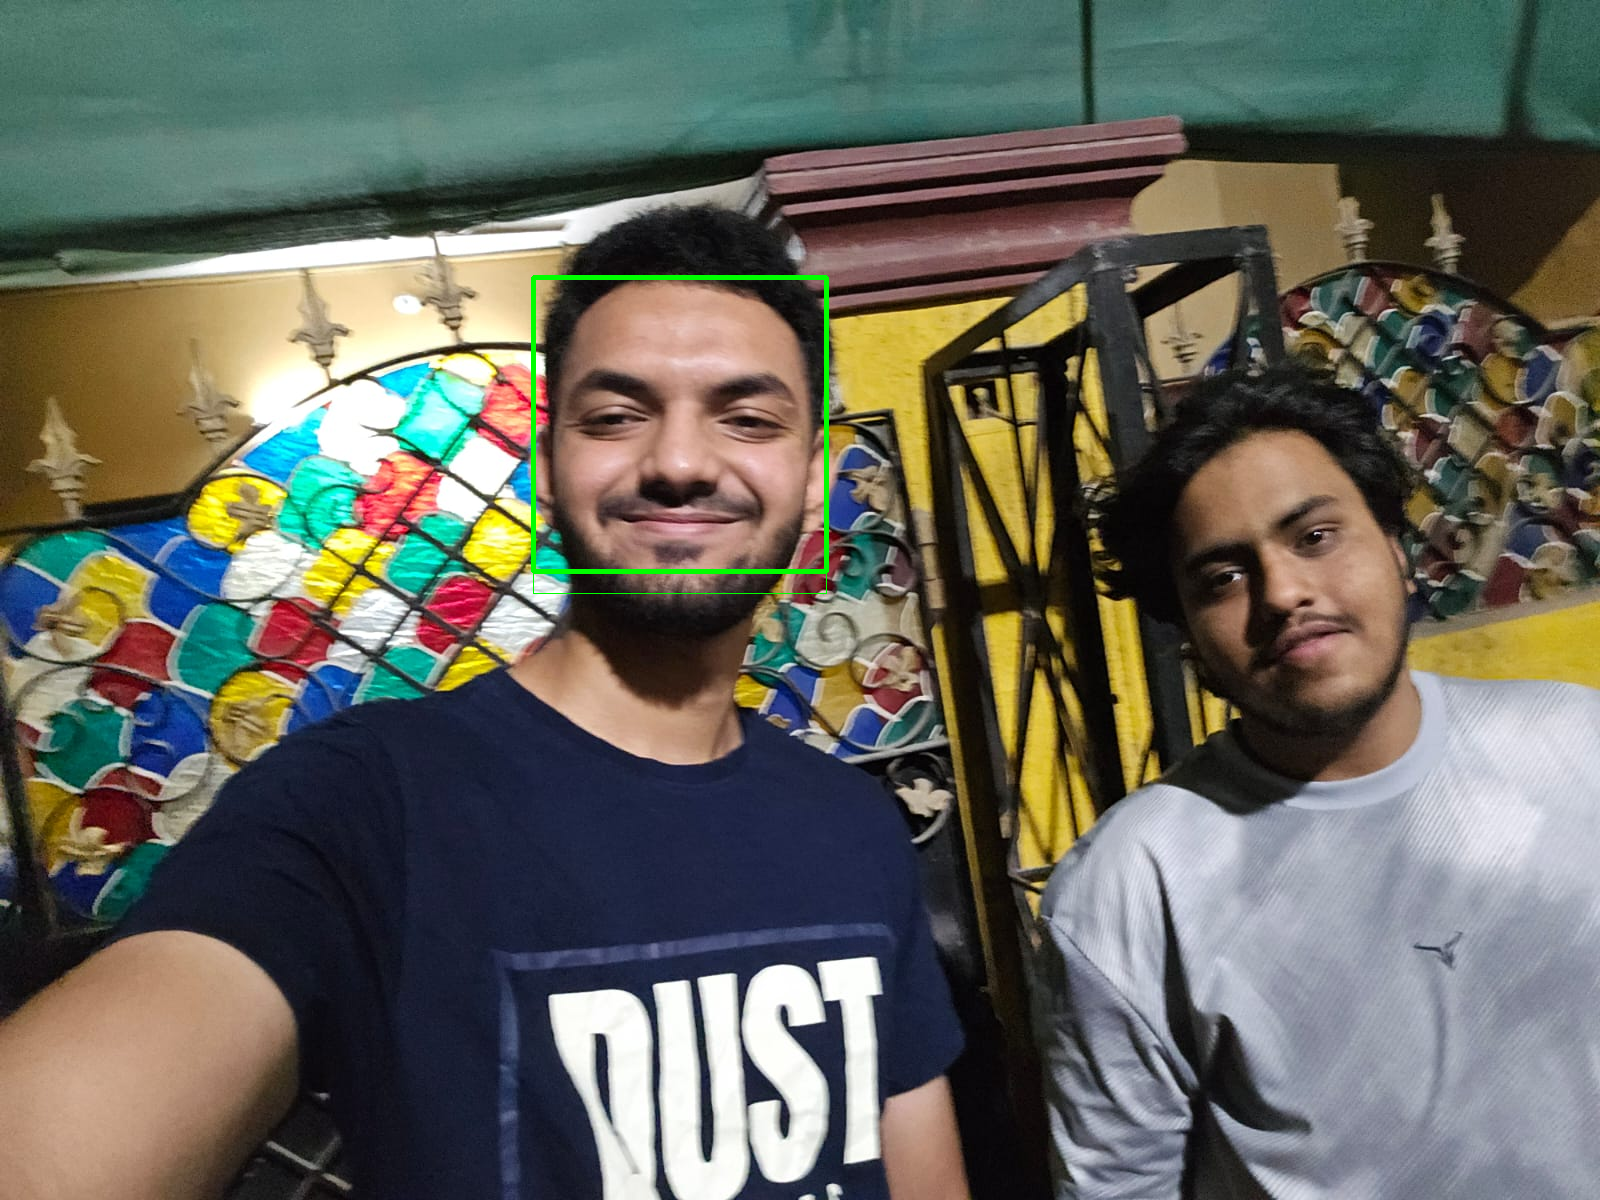

In [12]:
cv2_imshow(image)